# ML Introduction Exercise

### Objective

Use the fish dataset to predict the weight of the fish based on various features.

#### Features:

- **Species**: The species name of the fish.
- **Length1**: Vertical length in cm.
- **Length2**: Diagonal length in cm.
- **Length3**: Cross length in cm.
- **Height**: Height in cm.
- **Width**: Diagonal width in cm.
- **Weight**: Weight of the fish in grams (g).

### Data Preparation

- Clean the dataset if necessary before analysis.

### Task 1

1. Split the dataset randomly into training (70%) and testing (30%) sets.
2. Apply the following models:
   - Linear Regression
   - Random Forest
3. Calculate RMSE (Root Mean Squared Error) and R2 (Coefficient of Determination) on the test set.
   - RMSE: lower is better
   - R²: higher is better
4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.
5. Provide your opinion on which metric, RMSE or R2, is more appropriate in this case.

### Task 2

1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.
2. Repeat steps 2, 3, 4, from Task 1.

### Comparison

- Compare the results obtained from Task 1 and Task 2.

### Extra Point

- point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again)



`fish.info()`
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Species   159 non-null    category
 1   Weight    159 non-null    float64
 2   Vertical  159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Cross     159 non-null    float64
 5   Height    159 non-null    float64
 6   Width     159 non-null    float64
dtypes: category(1), float64(6)
memory usage: 8.8+ KB
```
`fish.groupby('Species').head(1)`
```
             Weight Vertical Diagonal  Cross   Height   Width
  Species                                                     
1 Bream       242.0     23.2     25.4   30.0  11.5200  4.0200
2 Parkki       55.0     13.5     14.7   16.5   6.8475  2.3265
3 Perch         5.9      7.5      8.4    8.8   2.1120  1.4080
4 Pike        200.0     30.0     32.3   34.8   5.5680  3.3756
5 Roach        40.0     12.9     14.1   16.2   4.1472  2.2680
6 Smelt         6.7      9.3      9.8   10.8   1.7388  1.0476
7 Whitefish   270.0     23.6     26.0   28.7   8.3804  4.2476
```
`fish.describe()`
```
            Weight    Vertical    Diagonal       Cross      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000
```

In [ ]:
import pandas as pd , numpy as np , seaborn as sea , matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Data, clean and convert Species to category in one line.
fish = (lambda df: df[df.select_dtypes(include=['number']).gt(0).all(axis=1)])(pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv").dropna().astype({"Species":"category"})).rename(columns={"Length1":"Vertical","Length2": "Diagonal","Length3":"Cross"}); fish

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


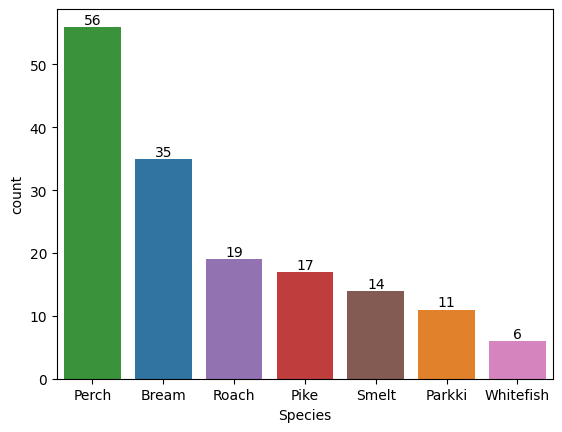

In [ ]:
for f in sea.countplot(data=fish, x="Species", order=fish["Species"].value_counts().index, hue="Species").containers: plt.gca().bar_label(f)

## Task 1

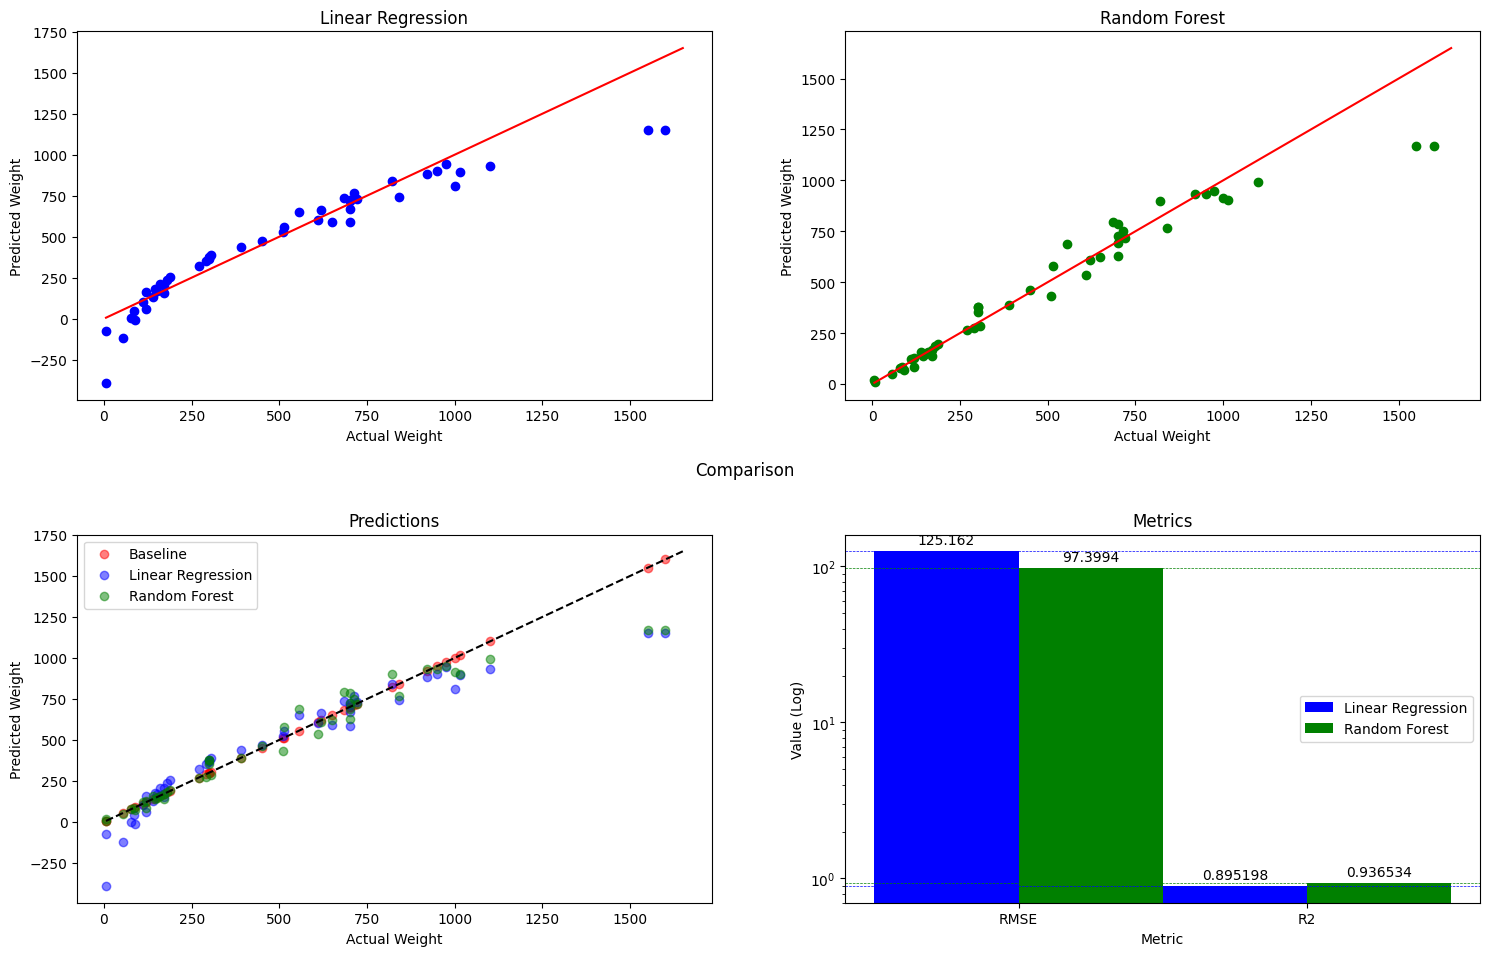

In [ ]:
models = {
    'lr': {
        'name': 'Linear Regression',
        'instance': LinearRegression(),
        'color': 'blue',
        'predictions': None,
        'metrics': None
    },
    'rf': {
        'name': 'Random Forest',
        'instance': RandomForestRegressor(random_state=0),
        'color': 'green',
        'predictions': None,
        'metrics': None
    }
}

# Split the dataset into features and target variable
X , Y = fish.drop(columns=['Weight']) , fish['Weight']

# One-hot encode the categorical variable 'Species'
X = pd.get_dummies(X, columns=['Species'], drop_first=True)

# Split the dataset randomly into training (70%) and testing (30%) sets
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train Models and make predictions
for model in models.values():
    model['instance'].fit(X_train, Y_train)
    model['predictions'] = model['instance'].predict(x_test)
    model['metrics'] = [
        mean_squared_error(y_test, model['predictions'], squared=False),
        r2_score(y_test, model['predictions'])
    ]

# Visualization

plt.figure(figsize=(15,10))
plt.suptitle('Comparison', y=0.5)

for i, (key, model) in enumerate(models.items()):
    plt.subplot(2, 2, i + 1, title=model['name'])
    plt.xlabel('Actual Weight')
    plt.ylabel('Predicted Weight')
    plt.scatter(y_test, model['predictions'], color=model['color'])
    plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], color='red')

plt.subplot(2, 2, 3, title="Predictions")
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.scatter(y_test, y_test, label='Baseline', color='red', alpha=0.5)
for key, model in models.items():
    plt.scatter(y_test, model['predictions'], label=model['name'], color=model['color'], alpha=0.5)
plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], 'k--')
plt.legend()

ax = plt.subplot(2, 2, 4, title="Metrics")

for i, (key, model) in enumerate(models.items()):
    bars = ax.bar([i*0.5,1+i*0.5], model['metrics'], width=0.5, label=model['name'], color=model['color'])
    for bar in bars: ax.axhline(y=bar.get_height(), linestyle='--', linewidth=0.5, color=model['color'])
    ax.bar_label(bars, padding=3)

ax.set_xticks([0.25,1.25])
ax.set_xticklabels(['RMSE','R2'])
ax.set_ylabel('Value (Log)')
ax.set_xlabel('Metric')
ax.set_yscale('log')
ax.legend()

plt.tight_layout(h_pad=5,w_pad=5)

plt.show()


We see that the Random Forest Ensemble predictions are closer to the actual value especially for lower weights, where the Linear Regression performance suffers from predicting negative values, even after dropping that 0-weight row from the dataset. This is also confirmed by the RMSE score, which amplifies larger individual errors, where the R2 score provides a general sense of model fit by explaining the variance. It's likely due to the RF models ability to capture non-linear relationships between the features and target variable.

## Task 2

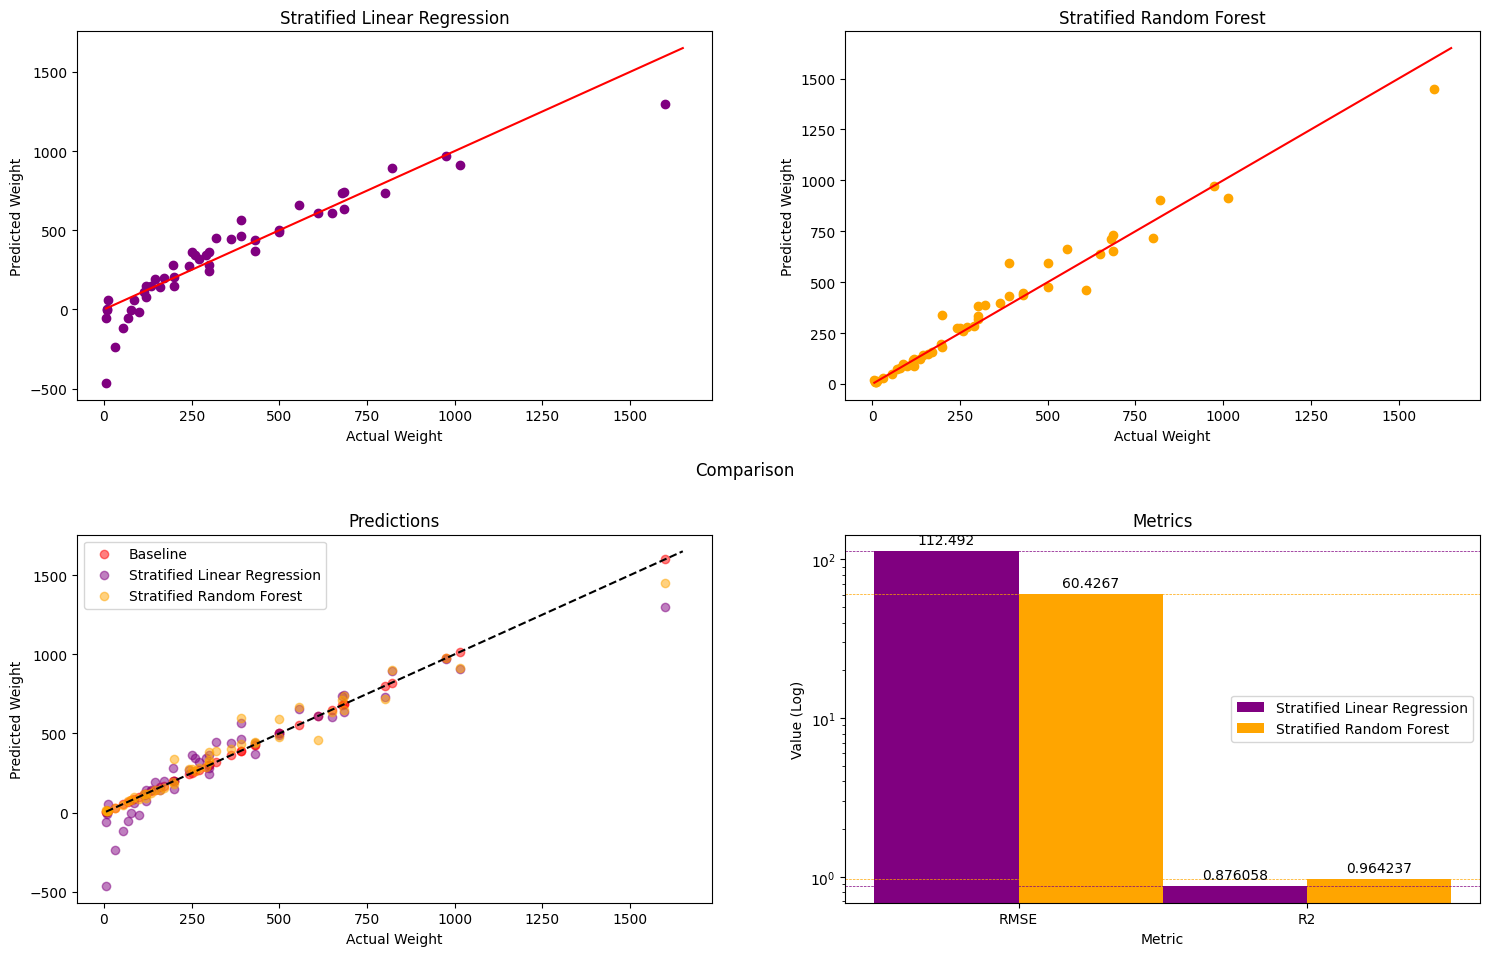

In [ ]:
models_strat = {
    'lrs': {
        'name': 'Stratified Linear Regression',
        'instance': LinearRegression(),
        'color': 'purple',
        'predictions': None,
        'metrics': None
    },
    'rfs': {
        'name': 'Stratified Random Forest',
        'instance': RandomForestRegressor(random_state=0),
        'color': 'orange',
        'predictions': None,
        'metrics': None
    }
}

# Split the dataset stratified into training (70%) and testing (30%) sets
X_train_strat, x_test_strat, Y_train_strat, y_test_strat = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=fish['Species'])

# Train Models and make predictions
for model in models_strat.values():
    model['instance'].fit(X_train_strat, Y_train_strat)
    model['predictions'] = model['instance'].predict(x_test_strat)
    model['metrics'] = [
        mean_squared_error(y_test_strat, model['predictions'], squared=False),
        r2_score(y_test_strat, model['predictions'])
    ]

# Visualization

plt.figure(figsize=(15,10))
plt.suptitle('Comparison', y=0.5)

for i, (key, model) in enumerate(models_strat.items()):
    plt.subplot(2, 2, i + 1, title=model['name'])
    plt.xlabel('Actual Weight')
    plt.ylabel('Predicted Weight')
    plt.scatter(y_test_strat, model['predictions'], color=model['color'])
    plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], color='red')

plt.subplot(2, 2, 3, title="Predictions")
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.scatter(y_test_strat, y_test_strat, label='Baseline', color='red', alpha=0.5)
for key, model in models_strat.items():
    plt.scatter(y_test_strat, model['predictions'], label=model['name'], color=model['color'], alpha=0.5)
plt.plot([Y.min(),Y.max()], [Y.min(),Y.max()], 'k--')
plt.legend()

ax = plt.subplot(2, 2, 4, title="Metrics")

for i, (key, model) in enumerate(models_strat.items()):
    bars = ax.bar([i*0.5,1+i*0.5], model['metrics'], width=0.5, label=model['name'], color=model['color'])
    for bar in bars: ax.axhline(y=bar.get_height(), linestyle='--', linewidth=0.5, color=model['color'])
    ax.bar_label(bars, padding=3)

ax.set_xticks([0.25,1.25])
ax.set_xticklabels(['RMSE','R2'])
ax.set_ylabel('Value (Log)')
ax.set_xlabel('Metric')
ax.set_yscale('log')
ax.legend()

plt.tight_layout(h_pad=5,w_pad=5)

plt.show()


We see that the models both perform better with stratified data, but with random forest benefiting the most, improving by ~38% after stratification and ~52% vs unstratified linear regression. Stratification ensures the proportional distribution of fish Species within the training and validation data in this case, avoiding any species to be over- or/and under-represented in either set, imbalancing the model.

### Comparison

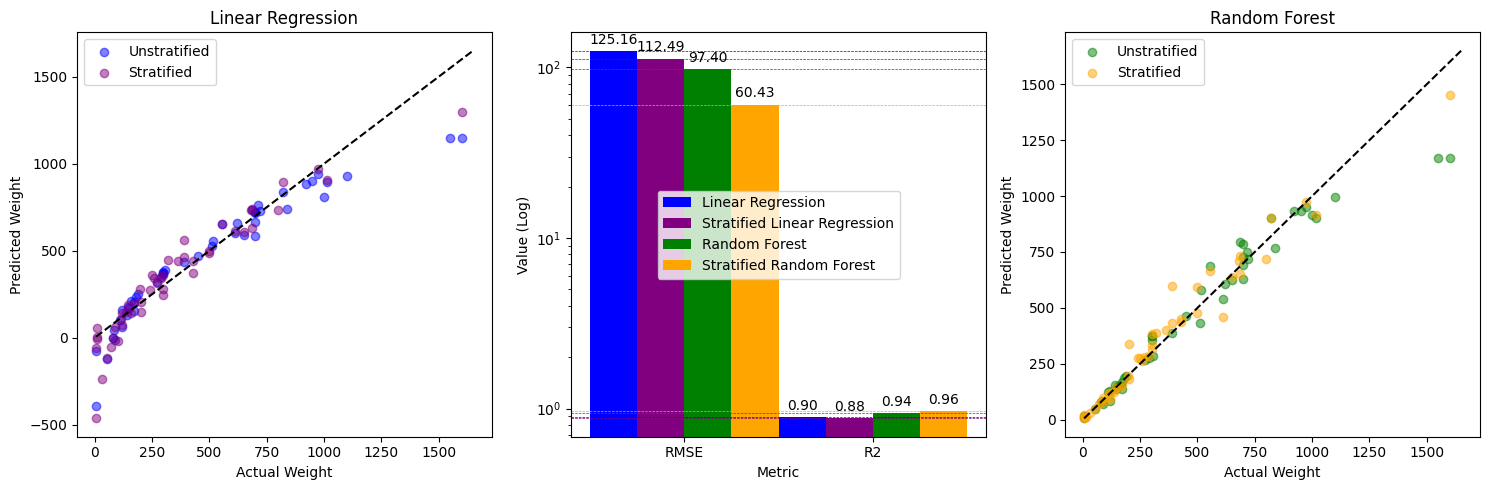

In [ ]:
_models = {**models, **models_strat}

plt.figure(figsize=(15,5))

for i, (key_unstrat, key_strat) in enumerate([('lr', 'lrs'), ('rf', 'rfs')]):
    plt.subplot(1, 3, 1+2*i, title=_models[key_unstrat]['name'])
    plt.scatter(y_test, _models[key_unstrat]['predictions'], label='Unstratified', color=_models[key_unstrat]['color'], alpha=0.5)
    plt.scatter(y_test_strat, _models[key_strat]['predictions'], label='Stratified', color=_models[key_strat]['color'], alpha=0.5)
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--')
    plt.ylabel('Predicted Weight')
    plt.xlabel('Actual Weight')
    plt.legend()

ax = plt.subplot(1, 3, 2)

for i, key in enumerate(['lr','lrs','rf','rfs']):
    bars = ax.bar([i*0.5,2+i*0.5], _models[key]['metrics'], width=0.5, label=_models[key]['name'], color=_models[key]['color'])
    for bar in bars: ax.axhline(y=bar.get_height(), linestyle='--', linewidth=0.5, color=_models[key]['color'])
    ax.bar_label(bars, padding=3, fmt="%1.2f")

ax.set_xticks([0.75,2.75])
ax.set_xticklabels(['RMSE','R2'])
ax.set_ylabel('Value (Log)')
ax.set_xlabel('Metric')
ax.set_yscale('log')
ax.legend(loc='center')

plt.tight_layout()
plt.show()


In the end we see, the performance improved with each step we took, being stratifying the data and/or using the alternate model. Stratified Random Forest takes the lead here with a significantly better score than all other runs, which can also be easily visually confirmed by the last scatter plot, looking at how close to the baseline that chonky fish is predicted now. There is a slight abnormality with the R2 score and RMSE for the stratified Linear Regression being lower than the unstratified one at the same time, suggesting  it's "fuzzyness" in the lower weight range impacted the squared mean error less than the outliers of the former one.

We also should consider the study by Andrej-Nikolai Spiess & Natalie Neumeyer:

Spiess, A. N., & Neumeyer, N. (2010). An evaluation of R² as an inadequate measure for nonlinear models in pharmacological and biochemical research: a Monte Carlo approach. BMC Pharmacology, 10(6). DOI: 10.1186/1471-2210-10-6
[1] https://bmcpharma.biomedcentral.com/articles/10.1186/1471-2210-10-6

That found, using a simulation, R² to be inappropriate for non-linear models.

### Bonus Point

Parameters that can be adjusted to improve model performance:

1. **Hyperparameters of the Random Forest model**:
    - Bootstrap:
        - bootstrap=True (default): Randomly sample data with replacement for each tree.
        - bootstrap=False: Use the entire dataset for each tree.
    - Number of trees:
        - n_estimators: Specifies the number of trees to build in the forest (default is 100). Higher values generally lead to better performance but increase computation time.
    - Maximum depth of the trees:
        - max_depth: Limits the maximum depth of each tree to prevent overfitting (default is None, meaning trees grow until all leaves are pure or contain less than min_samples_split samples).
    - Minimum samples split:
        - min_samples_split: Sets the minimum number of samples required to split an internal node (default is 2). Increasing this value can help prevent overfitting.
    - Minimum samples leaf:
        - min_samples_leaf: Specifies the minimum number of samples required to be at a leaf node (default is 1). Increasing this value can also help prevent overfitting.

2. **Feature Engineering**:
   - Creating new features from existing ones (e.g., ratios of lengths, interaction terms).

3. **Regularization in Linear Regression**:
   - Using Ridge or Lasso regression to potentially improve performance by penalizing large coefficients.

4. **Data Transformation**:
   - Applying log transformation to skewed data or scaling the features to have zero mean and unit variance.

5. **Cross-Validation**:
   - Using cross-validation to ensure the model generalizes well to unseen data.

We can run a gridsearch to find the "best" (by chosen score) parameters: (slow!)

In [ ]:
### !! SLOW !! ###

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [1, fish['Species'].nunique(), 100],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_strat = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, Y_train)

print(f"Best parameters for unstratified data: {grid_search.best_params_}")
print(f"Best RMSE score for unstratified data: {(-grid_search.best_score_)**0.5}")

grid_search_strat.fit(X_train_strat, Y_train_strat)

print(f"Best parameters for stratified data: {grid_search_strat.best_params_}")
print(f"Best RMSE score for stratified data: {(-grid_search_strat.best_score_)**0.5}")


Best parameters for unstratified data: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE score for unstratified data: 79.75881540382994
Best parameters for stratified data: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best RMSE score for stratified data: 78.45625706549653


### Further Research

Residual plots focus on the errors made by the model. They are helpful for identifying patterns in errors and potential areas for improvement. Ideally residuals should be randomly scattered around the horizontal line (y=0). A pattern in residuals indicates the model might be missing some underlying structure in the data.
The spread of residuals indicates the accuracy of predictions. A smaller spread suggests better predictions. Extreme residuals might indicate outliers in the data or areas where the model performs poorly.

We see that the first linear regression model shows a strong curved pattern.

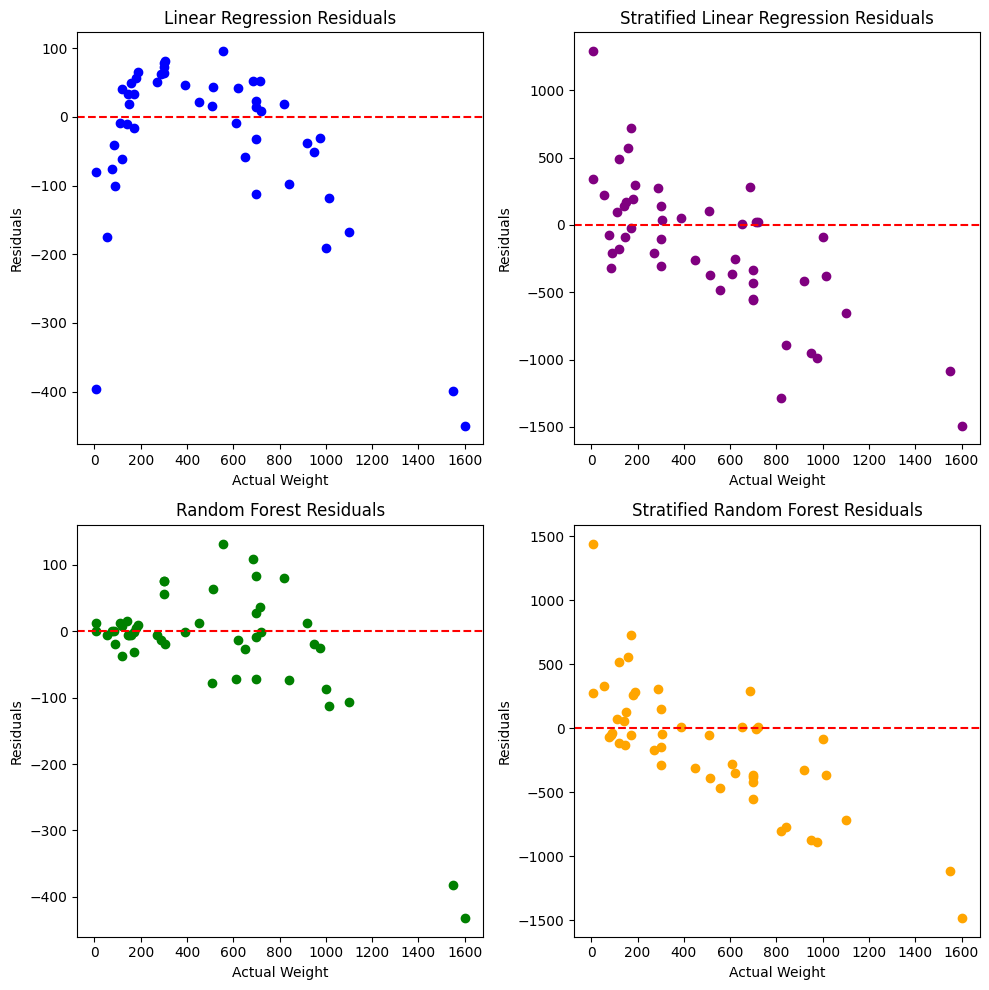

In [ ]:
# Residual Plots

plt.figure(figsize=(10,10))

for i, key in enumerate(['lr','lrs','rf','rfs']):
    plt.subplot(2, 2, i+1, title=_models[key]['name']+' Residuals')
    plt.scatter(y_test, _models[key]['predictions'] - y_test, color=_models[key]['color'])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Weight')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Feature Importance Plots rank the features of a model in order of importance, if the model uses features. We can see Width has been decided as the most important one for predictions by the tree estimator, followed by cross length. We can also observe that Whitefish species category importance was ranked lower after stratifying, it's the rarest in the dataset but was not balanced in.

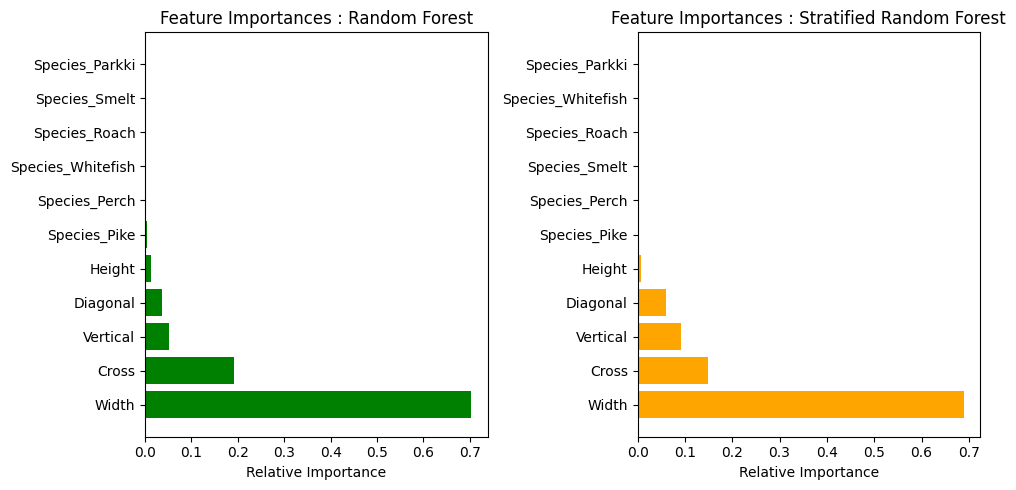

In [ ]:
# Feature Importance Plot

plt.figure(figsize=(10,5))
features = X.columns.tolist()
for i, key in enumerate(['rf','rfs']):
    plt.subplot(1,2,i+1, title='Feature Importances : '+_models[key]['name'])
    importances_rf = _models[key]['instance'].feature_importances_
    indices_rf = np.argsort(importances_rf)[::-1]
    plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color=_models[key]['color'], align='center')
    plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
    plt.xlabel('Relative Importance')

plt.tight_layout()
plt.show()

We can actually check the Species distribution of the stratified and unstratified splits and will see, without stratification the training and testing data is not balanced, but with stratification its balanced.

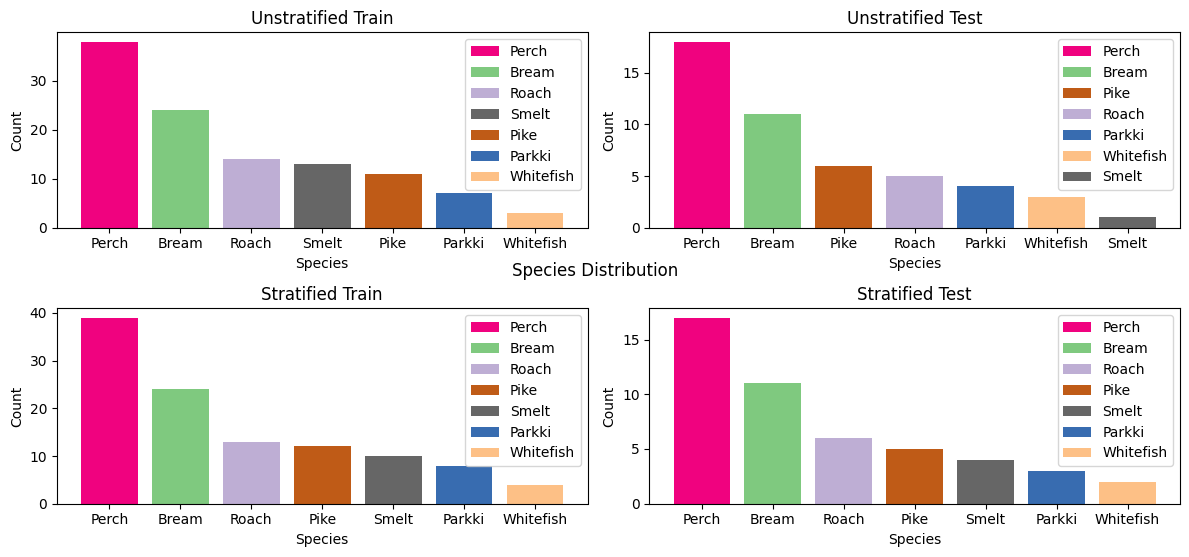

In [8]:
data = [
    (train_test_split(fish.drop(columns=['Weight']), fish['Weight'], test_size=0.3, random_state=0)[0], 'Unstratified Train'),
    (train_test_split(fish.drop(columns=['Weight']), fish['Weight'], test_size=0.3, random_state=0)[1], 'Unstratified Test'),
    (train_test_split(fish.drop(columns=['Weight']), fish['Weight'], test_size=0.3, random_state=0, stratify=fish['Species'])[0], 'Stratified Train'),
    (train_test_split(fish.drop(columns=['Weight']), fish['Weight'], test_size=0.3, random_state=0, stratify=fish['Species'])[1], 'Stratified Test')
]

fig, axes = plt.subplots(2, 2, figsize=(12,6))

for i, (data, title) in enumerate(data):
    for j, (species, count) in enumerate(data['Species'].value_counts().items()):
        axes[i // 2, i % 2].bar(species, count, color={species: plt.cm.Accent.resampled(len(fish['Species'].unique()))(i) for i, species in enumerate(fish['Species'].unique())}[species], label=species)
    axes[i // 2, i % 2].set_xlabel('Species')
    axes[i // 2, i % 2].set_ylabel('Count')
    axes[i // 2, i % 2].set_title(title)
    axes[i // 2, i % 2].legend()

plt.suptitle('Species Distribution', y=0.5)
plt.tight_layout()
plt.show()

Correlation helps identifying Multicollinearity in the dataset. The heatmap shows a strong relation between the 3 length columns, so a possibility would be to replace them with a new feature to reduce dimensionality.

            Weight  Vertical  Diagonal     Cross    Height     Width
Weight    1.000000  0.915719  0.918603  0.923090  0.723857  0.886654
Vertical  0.915719  1.000000  0.999516  0.992004  0.624409  0.866684
Diagonal  0.918603  0.999516  1.000000  0.994083  0.639503  0.873201
Cross     0.923090  0.992004  0.994083  1.000000  0.702655  0.878189
Height    0.723857  0.624409  0.639503  0.702655  1.000000  0.792401
Width     0.886654  0.866684  0.873201  0.878189  0.792401  1.000000


<Axes: >

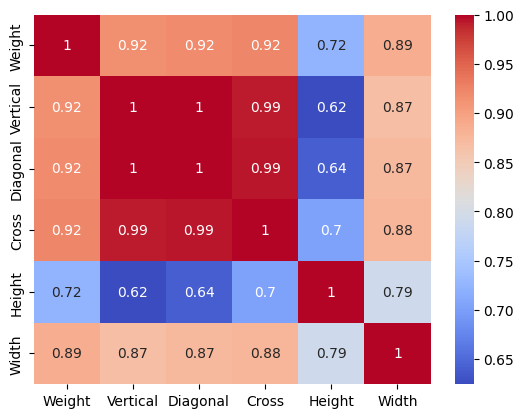

In [ ]:
correlation_matrix = fish[fish.select_dtypes(include=['number']).columns].corr()
print(correlation_matrix)
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Pair plots and also be used for deeper analysis of the features. The diagonal of the pair plot shows the distribution of each variable, allowing to see if they are normally distributed, skewed, or have any outliers. The off-diagonal plots show scatterplots between pairs of variables, his helps identify potential correlations - positive, negative, linear, non-linear, or just no correlation. We also might observe clusters of data points in the scatterplots, suggesting the presence of subgroups within our data. Going from here we could explore more suitable features, or training different models per species to improve our predictions.

We can learn a lot:
- Linear correlation between the lentgh columms made visible
- Correlations of other features differ strongly by Species
- Almost linear corr of Weight to Lengths for Bream but nonlinear for others



In [ ]:
sea.pairplot(data=fish, x_vars=fish.select_dtypes(include=['number']).columns, y_vars=fish.select_dtypes(include=['number']).columns, hue='Species', kind='reg', diag_kind='kde', corner=True)

Other Models

Model: GradientBoostingRegressor
RMSE: 0.9790204495620579
R2: 46.28196955196751


Model: LinearRegression
RMSE: 0.8760581318037711
R2: 112.4922912215953


Model: RandomForestRegressor
RMSE: 0.9633886491823519
R2: 61.139463005526686


Model: HistGradientBoostingRegressor
RMSE: 0.9156828535723127
R2: 92.78370135695717


Model: AdaBoostRegressor
RMSE: 0.9574814619337648
R2: 65.8874811920801


Model: BaggingRegressor
RMSE: 0.9602694332122476
R2: 63.6907149172206


Model: ExtraTreesRegressor
RMSE: 0.9772867334409661
R2: 48.15634779289227


Model: StackingRegressor
RMSE: 0.9637722386437175
R2: 60.81833025699416


Model: VotingRegressor
RMSE: 0.9696366931268295
R2: 55.67859630863932


Model: XGBRegressor
RMSE: 0.9590659782972653
R2: 64.6481276383808




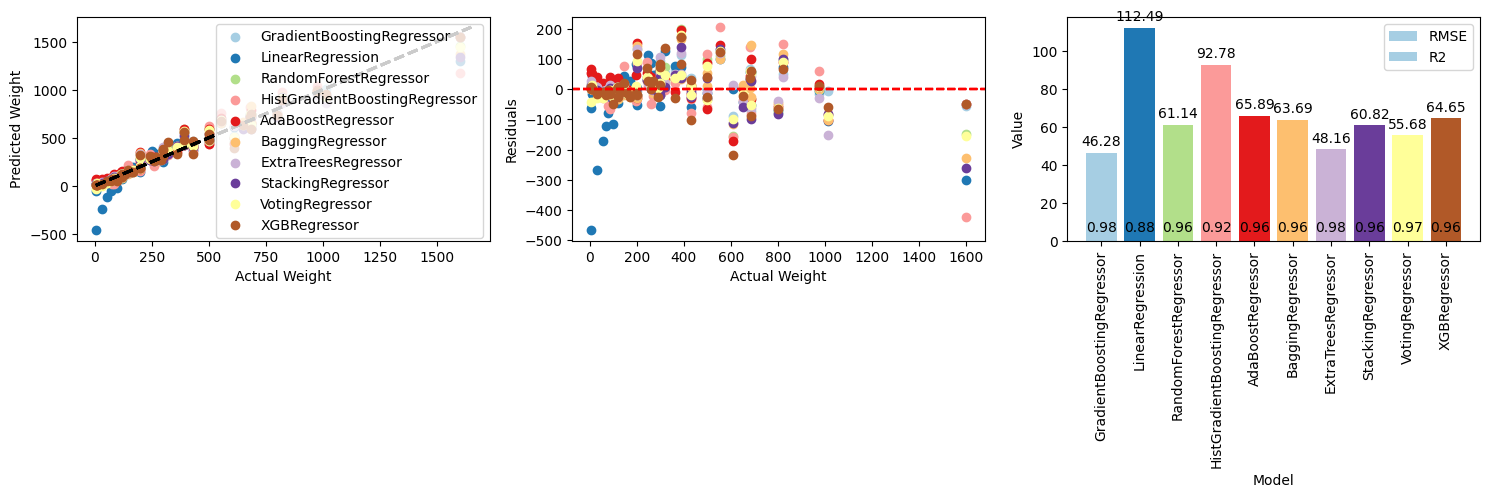

In [15]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor

base_estimators = [
    ('lr' , LinearRegression()),
    ('rf' , RandomForestRegressor()),
    ('et' , ExtraTreesRegressor()),
    ('ada', AdaBoostRegressor()),
    ('bag', BaggingRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('hgb', HistGradientBoostingRegressor()),
]

xmodels = {}

for model in [
    GradientBoostingRegressor(), # Used by Scikit-Learn on the fish dataset
    LinearRegression(),
    RandomForestRegressor(),
    HistGradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    StackingRegressor(estimators=base_estimators, final_estimator=VotingRegressor(estimators=base_estimators)),
    VotingRegressor(estimators=base_estimators),
    XGBRegressor(),
]:

    model_name = type(model).__name__
    xmodels[model_name] = {}

    model.fit(X_train_strat, Y_train_strat)

    xmodels[model_name]['predictions'] = model.predict(x_test_strat)
    xmodels[model_name]['metrics'] = [
        r2_score(y_test_strat, xmodels[model_name]['predictions']),
        mean_squared_error(y_test_strat, xmodels[model_name]['predictions'], squared=False)
    ]

    print(f"Model: {model_name}")
    print(f"RMSE: {xmodels[model_name]['metrics'][0]}")
    print(f"R2: {xmodels[model_name]['metrics'][1]}")
    print(f"\n")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, model_name in enumerate(xmodels):
    axes[1].scatter(y_test_strat, xmodels[model_name]['predictions'] - y_test_strat, color=plt.cm.Paired(i / (len(xmodels)-1)), label=model_name)
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel('Actual Weight')
    axes[1].set_ylabel('Residuals')
    axes[0].scatter(y_test_strat, xmodels[model_name]['predictions'], color=plt.cm.Paired(i / (len(xmodels)-1)), label=model_name)
    axes[0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    axes[0].set_ylabel('Predicted Weight')
    axes[0].set_xlabel('Actual Weight')
    axes[0].legend()

bars_rmse = axes[2].bar(xmodels.keys(), [x['metrics'][0] for x in xmodels.values()], color=plt.cm.Paired(np.linspace(0, 1, len(xmodels))))
bars_r2 = axes[2].bar(xmodels.keys(), [x['metrics'][1] for x in xmodels.values()], color=plt.cm.Paired(np.linspace(0, 1, len(xmodels))))
axes[2].bar_label(bars_rmse, fmt="%1.2f", padding=3)
axes[2].bar_label(bars_r2, fmt="%1.2f", padding=3)
axes[2].legend(['RMSE', 'R2'])
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Value')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Deep Learning

Epoch 1/10000
3/3 [==============================] - 3s 138ms/step - loss: 220926.4375 - root_mean_squared_error: 470.0281 - val_loss: 293300.6562 - val_root_mean_squared_error: 541.5724
Epoch 2/10000
3/3 [==============================] - 0s 38ms/step - loss: 218843.0312 - root_mean_squared_error: 467.8066 - val_loss: 290814.2500 - val_root_mean_squared_error: 539.2720
Epoch 3/10000
3/3 [==============================] - 0s 30ms/step - loss: 216751.4062 - root_mean_squared_error: 465.5657 - val_loss: 288372.8438 - val_root_mean_squared_error: 537.0036
Epoch 4/10000
3/3 [==============================] - 0s 29ms/step - loss: 214844.3906 - root_mean_squared_error: 463.5131 - val_loss: 286086.9375 - val_root_mean_squared_error: 534.8710
Epoch 5/10000
3/3 [==============================] - 0s 30ms/step - loss: 212936.2969 - root_mean_squared_error: 461.4502 - val_loss: 283726.3125 - val_root_mean_squared_error: 532.6597
Epoch 6/10000
3/3 [==============================] - 0s 29ms/step - l

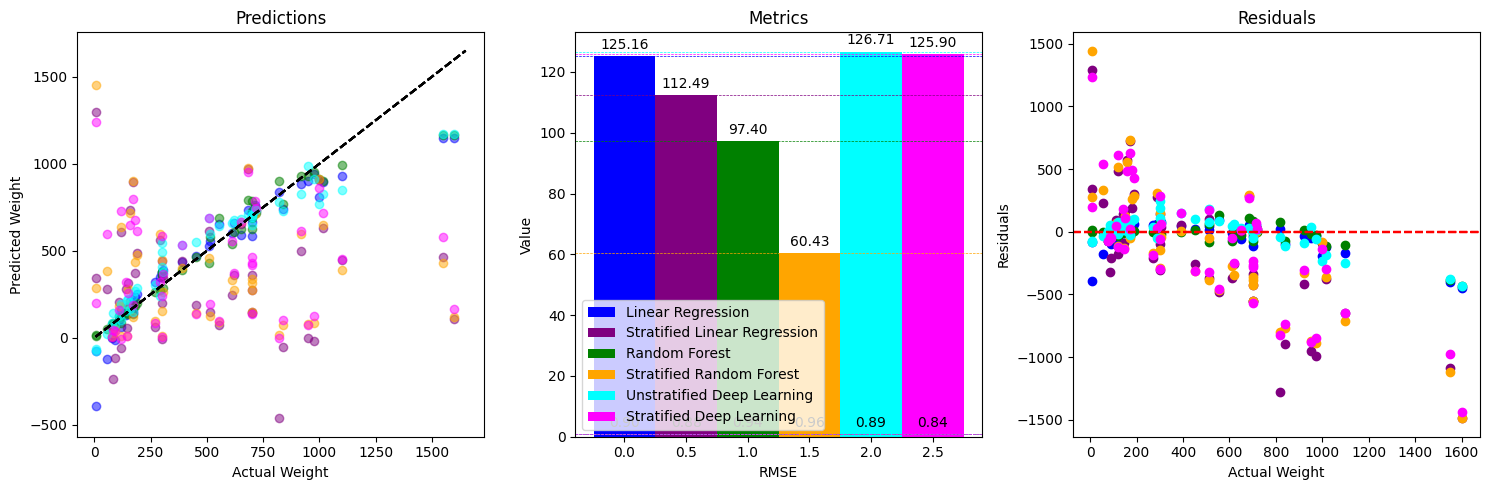

In [13]:
import tensorflow as tf

EPOCHS = 10000
BATCH_SIZE = 32
VERBOSE = 1
METRIC = 'root_mean_squared_error'

models_dl = {
    'dlu': {
        'name': 'Unstratified Deep Learning',
        'instance': tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
                        tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ]),
        'color': 'cyan',
        'predictions': None,
        'metrics': None
    },
    'dls': {
        'name': 'Stratified Deep Learning',
        'instance': tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_strat.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ]),
        'color': 'magenta',
        'predictions': None,
        'metrics': None
    }
}

train_data = [(X_train, Y_train), (X_train_strat, Y_train_strat)]
test_data = [(x_test, y_test), (x_test_strat, y_test_strat)]

for i, (model, (x_tr, y_tr), (x_te, y_te)) in enumerate(zip(models_dl.values(), train_data, test_data)):
    model['instance'].compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['RootMeanSquaredError'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=METRIC, patience=10)
    checkpoint_path = "model.keras"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor=METRIC,
        save_best_only=True,
        save_weights_only=False
    )

    model['instance'].fit(x_tr.astype('float32'), y_tr.astype('float32'),
                          epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, verbose=VERBOSE,
                          callbacks=[early_stopping, checkpoint_callback])
    model['instance'].load_weights(checkpoint_path)

    model['predictions'] = model['instance'].predict(x_te.astype('float32')).flatten()
    model['metrics'] = [
        mean_squared_error(y_te, model['predictions'], squared=False),
        r2_score(y_te, model['predictions'])
    ]

modelz = {**models, **models_strat, **models_dl}

# Visualization

plt.figure(figsize=(15,5))

ax = plt.subplot(1, 3, 1, title='Predictions')

for key, model in modelz.items():
    plt.scatter(y_test, model['predictions'], label=model['name'], color=model['color'], alpha=0.5)
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--')
    plt.ylabel('Predicted Weight')
    plt.xlabel('Actual Weight')

ax = plt.subplot(1, 3, 2, title='Metrics')

for i, group in enumerate([('lr', 'lrs','rf', 'rfs'), ('dlu', 'dls')]):
    for j, key in enumerate(group):
        bars = ax.bar([i * 2 + j * 0.5], modelz[key]['metrics'], width=0.5,
                       label=modelz[key]['name'], color=modelz[key]['color'])
        for bar in bars:
            ax.axhline(y=bar.get_height(), linestyle='--', linewidth=0.5, color=modelz[key]['color'])
        ax.bar_label(bars, padding=3, fmt="%1.2f")

ax.legend(loc='best')
ax.set_ylabel('Value')
ax.set_xlabel('RMSE')

ax = plt.subplot(1, 3, 3, title='Residuals')

for i, (key, model) in enumerate(modelz.items()):
    plt.scatter(y_test, modelz[key]['predictions'] - y_test, color=modelz[key]['color'])
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Weight')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.show()